# TASK-1 :-  TITANIC CLASSIFICATION 

# Importing necessary libraries

In [1]:
#To ignore the warnings we import this module
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np                  #import numpy library for numerical computations
import pandas as pd                 #import pandas library for data manipulation and analysis
import seaborn as sns               #import seaborn library for statistical data visualization
import matplotlib.pyplot as plt     #import matplotlib library for data visualization
%matplotlib inline
import plotly.express as px

# Importing the dataset

In [3]:
train = pd.read_csv(r"C:\Users\Microsoft\Documents\train (1).csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Dropping out necessary columm 
train=train.drop(["Name","PassengerId"],axis=1)

In [6]:
#Renaming the column
train.rename(columns={'SibSp':'Sibling','Pclass':'Class'},inplace=True)                     

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Class     891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Sibling   891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
# Count types of data types
train.dtypes.value_counts()

int64      4
object     4
float64    2
dtype: int64

In [9]:
#To check the number of rows and columns in dataset
train.shape

(891, 10)

In [10]:
#Show the name of columns
train.columns

Index(['Survived', 'Class', 'Sex', 'Age', 'Sibling', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Show range of index
train.index

RangeIndex(start=0, stop=891, step=1)

Survived      0
Class         0
Sex           0
Age         177
Sibling       0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


<Axes: >

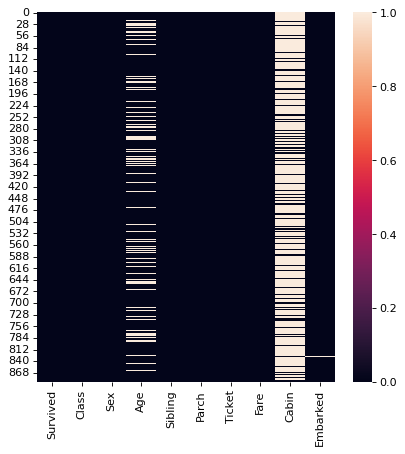

In [12]:
#To check null values in dataset
print(train.isna().sum())
plt.figure(figsize=(6,6),dpi=80)
sns.heatmap(train.isnull())

# The heatmap indicates that there are null values in column age and cabin

In [13]:
#Total null values present in dataset
train.isna().sum().sum()

866

In [14]:
#To check the duplicates in dataset
train.duplicated().sum()

15

In [15]:
train.describe()

,Survived,Class,Age,Sibling,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


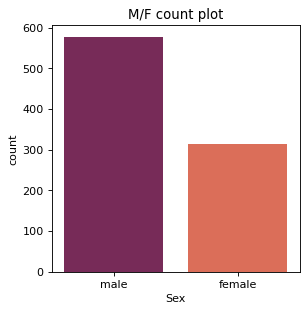

In [16]:
plt.figure(figsize=(4,4),dpi=80)
plt.title('M/F count plot')
sns.countplot(x='Sex',palette='rocket',data=train)
plt.show()

# The graph shows that make population is more than female on ship.

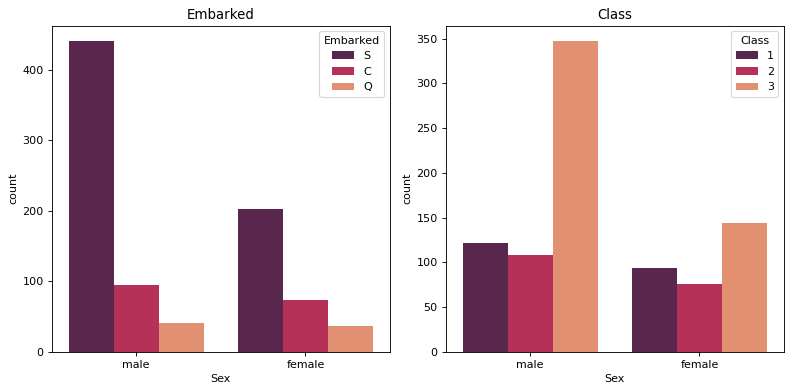

In [17]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
plt.title('Embarked')
sns.countplot(x='Sex' , palette='rocket',data=train,hue='Embarked')
              
plt.subplot(1,2,2)
plt.title('Class')
sns.countplot(x='Sex',palette='rocket',data=train,hue='Class')

plt.tight_layout()
plt.show()

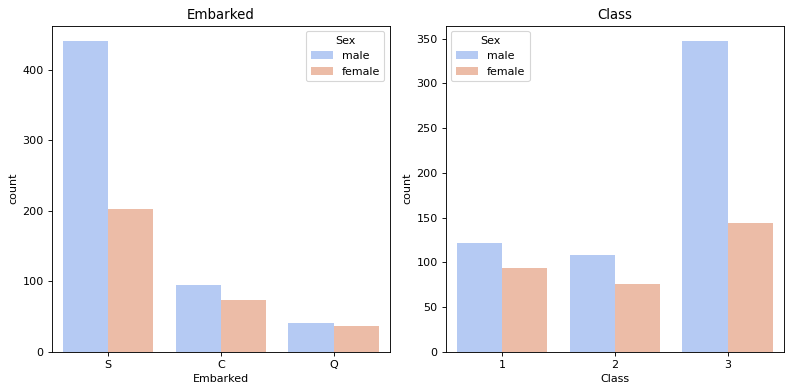

In [18]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
plt.title('Embarked')
sns.countplot(x='Embarked',palette='coolwarm',data=train,hue='Sex')

plt.subplot(1,2,2)
plt.title('Class')
sns.countplot(x='Class',palette='coolwarm',data=train,hue='Sex')

plt.tight_layout()
plt.show()

In [19]:
#Creating dummy variables for the 'sex' column using get_dummies() function 
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
#Creating dummy variables for the 'Age' column using get_dummies() function
Age = pd.get_dummies(train['Age'],drop_first=True)
Age.head()

,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Creating dummy variables for the 'Embarked' column using get_dummies() function
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Embarked.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
#Creating dummy variables for the 'Survived' column using get_dummies() function
Survived = pd.get_dummies(train['Survived'],drop_first=True)
Survived.head()

,1
0,0
1,1
2,1
3,1
4,0


In [24]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    
train['Person']=train[['Age','Sex']].apply(male_female_child,axis=1)
print(train.columns)

Index(['Survived', 'Class', 'Sex', 'Age', 'Sibling', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Person'],
      dtype='object')


# Countplot

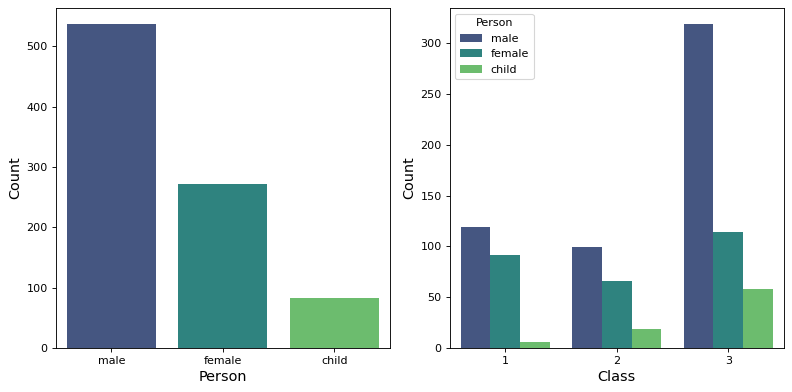

In [25]:
plt.figure(figsize=(10,5),dpi=80)
ax=plt.subplot(1,2,1)
sns.countplot(x='Person',data=train,palette='viridis')
ax.set_xlabel('Person',fontsize=13)
ax.set_ylabel('Count',fontsize=13)

ax=plt.subplot(1,2,2)
sns.countplot(x='Class',hue='Person',data=train,palette='viridis')
ax.set_xlabel('Class',fontsize=13)
ax.set_ylabel('Count',fontsize=13)

plt.tight_layout()
plt.show()

# Ploting Pie diagram

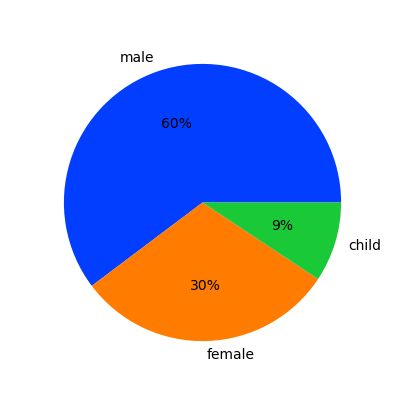

In [26]:
a=train['Person'].value_counts()
plt.figure(figsize=(5,5),dpi=100)
palette_color=sns.color_palette('bright')
plt.pie(a , colors=palette_color,labels=a.index,radius=0.9,autopct='%.0f%%')
plt.show()

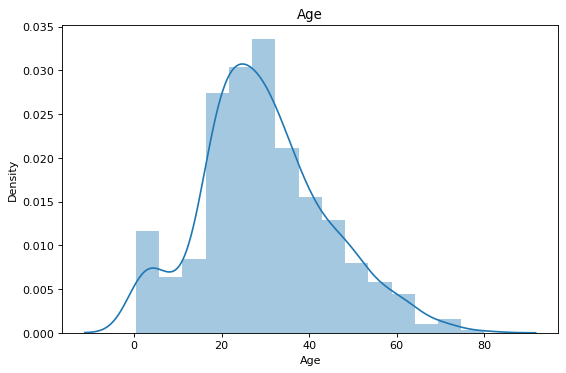

In [28]:
#Visualizing the age column
plt.figure(figsize=(8,5),dpi=80)
plt.title('Age')
sns.distplot(train['Age'],bins=15)
plt.show()

# Graph indicates that people travelling from ship are age 20-30

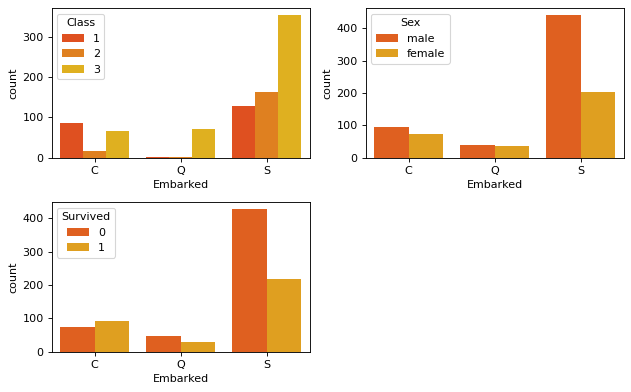

In [29]:
plt.figure(figsize=(8,5),dpi=80)
plt.subplot(2,2,1)
sns.countplot(x='Embarked',data=train,hue='Class',order=['C','Q','S'],palette='autumn')

plt.subplot(2,2,2)
sns.countplot(x='Embarked',data=train,hue='Sex',order=['C','Q','S'],palette='autumn')

plt.subplot(2,2,3)
sns.countplot(x='Embarked',data=train,hue='Survived',order=['C','Q','S'],palette='autumn')

plt.tight_layout()
plt.show()

# Graph1:

1) From 'S' there are higher number of class 1 people on ship.
2) From 'Q' there are smaller number of passengers travelling from all the classes.
3) Class 3 passengers belonging from 'S' are higher amount of passenger travelling on ship.


# Graph2:

1) Male and female both belonging from 'S' are more in number.

# Graph3:

1) 0-> not survived
2) 1-> survived 
3) More amount of people survived from 'S' and viceversa from 'Q'

In [30]:
#Passenger travelling alone with family
train['Alone']=train['Sibling'] + train['Parch']
def alones(values):
    if values == 0:
        return('alone')
    else:
        return('with family')
train['Alone']=train['Alone'].apply(alones)

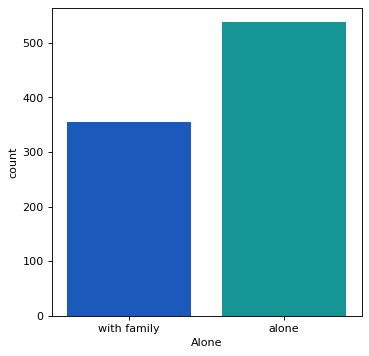

In [31]:
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='Alone',data=train,palette='winter')
plt.show()

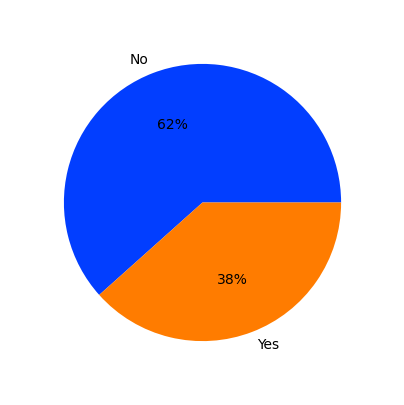

In [32]:
#Passenger survived or not 
plt.figure(figsize=(5,5),dpi=100)
train['Survivor']=train['Survived'].map({0:'No',1:'Yes'})
b=train['Survivor'].value_counts()
plt.pie(b,colors=palette_color,labels=b.index,radius=0.9,autopct='%.0f%%')
plt.show()

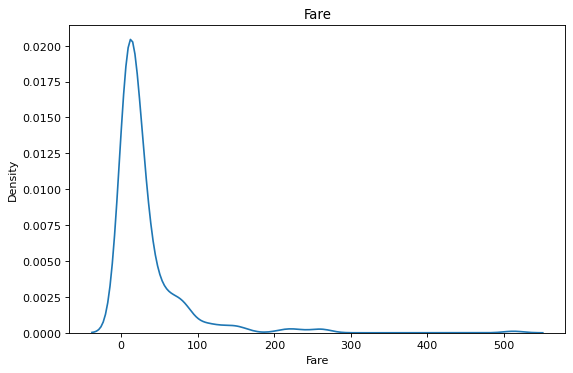

In [33]:
#Visualizing the fare column
plt.figure(figsize=(8,5),dpi=80)
plt.title('Fare')
sns.kdeplot(train['Fare'])
plt.show()

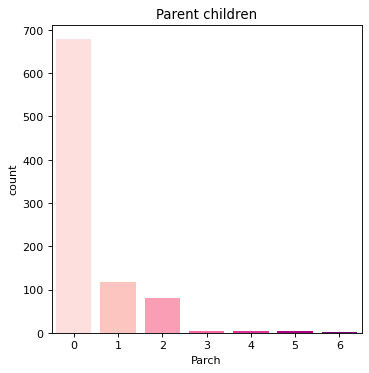

In [34]:
#Count of passenger having parent or children
plt.figure(figsize=(5,5),dpi=80)
sns.countplot(x='Parch',data=train,palette='RdPu',saturation=1)
plt.title('Parent children')
plt.show()

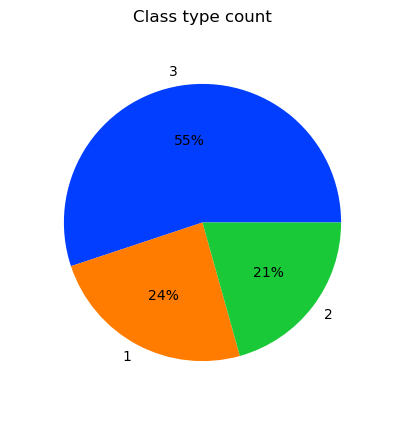

In [35]:
#Passenger survived or not
plt.figure(figsize=(5,5),dpi=100)
c=train['Class'].value_counts()
plt.title('Class type count')
plt.pie(c,colors=palette_color,labels=c.index,radius=0.9,autopct='%.0f%%')
plt.show()

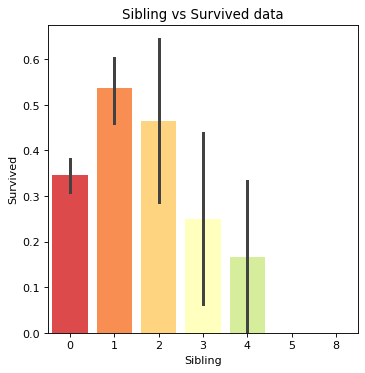

In [36]:
plt.figure(figsize=(5,5),dpi=80)
plt.title('Sibling vs Survived data')
sns.barplot(x='Sibling',y='Survived',data=train,palette='Spectral',saturation=1)
plt.show()

# Thank You......